# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I investigate the Medical Appointment no show dataset.
This dataset has collected information from 110 527 medical appointments in Brazil for roughly 7 month.

This dataset mainly focused on whether or not patients show up to their appointment. it appears to have extensive socio-demographic & health information at our disposal to potentially know the causes of their absences.

##### By order here are the several variables :

`01 - PatientId            = Identification of a patient`

`02 - AppointmentID        = Identification of each appointment`

`03 - Gender               = Male or Female`

`04 - Schedule_Day         = The day of the actuall appointment, when they have to visit the doctor.`

`05 - Appointment_Day      = The day someone called or registered the appointment.`

`06 - Age                  = How old is the patient.`

`07 - Neighbourhood        = Where the appointment takes place.`

`08 - Scholarship          = indicates whether or not the patient is enrolled in Brasilian welfare program.`

`09 - Hipertension         = True or False`

`10 - Diabetes             = True or False`

`11 - Alcoholism           = True or False`

`12 - Handcap              = True or False`

`13 - SMS_received         = 1 or more messages sent to the patient.`

`14 - No-show              = ‘No’ if the patient showed up, ‘Yes’ if they did not show up.`


#### Questions to be investigated:

######  1 . Appointment show-up vs. no show-up rate ?

###### 2. Are SMS appointment reminders effective ?

###### 3. Which neighborhoods have the more no shows?

###### 4. Do No Show depends of days of the week ?

###### 5. Age distribution of no-shows versus shows?

In [1594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1595]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Over 110 527 row are available to be process on 14 columns. 

#### Data Wrangling

Looking for data aberations (Null, duplicates, non sens) 

In [1596]:
# checking for null values
null = pd.isna(df).sum()
print(null)

# checking for duplicate values
duplicates = df.duplicated().sum()
print(duplicates)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
0


> Null & Duplicates Value are inexistant in this dataset

> Now let's look at the data set more specifically:

In [1597]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [1599]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> For a better understanding i'll first :
    - Rename some columns 
    - Change the types of some variable
    - address some inconsistency : 
    
                                - min age = -1
                                - Max age = 115 

### Data Cleaning

#### 1. Changing column names

In [1600]:
df.rename(columns = {'PatientId':'Patient_ID',
                     'AppointmentID':'Appointment_ID',
                     'ScheduledDay':'Schedule_Day', 
                     'AppointmentDay':'Appointment_Day', 
                     'Neighbourhood': 'Neighborhood', 
                     'Hipertension': 'Hypertension',
                     'Handcap':'Handicap',
                     'No-show':'No_Show'}, inplace = True)
df.head()

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Changing Datatypes

In [1601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null float64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Schedule_Day       110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighborhood       110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Change to make

Patient_ID       :  Float → Int ✓

Appointment_Day  :  Float → Int ✓

Schedule_Day     :  Float → Int ✓

No_Show          :  Str → Int  ✓



####                    A]  Patient Id  ✓

In [1602]:
# Patient Id from float to int, for no longer dealing with + decimal format
df['Patient_ID'] = df['Patient_ID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Schedule_Day       110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighborhood       110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


####                    B]  Appointment Day   ✓
Reminder : The day someone called or registered the appointment, this is before appointment of course.
We'll clean the columns by deleting the hours format and only let appears the date

In [1603]:
# Appointment_Day from String to Datetime
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Schedule_Day       110527 non-null object
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighborhood       110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


In [1604]:
df

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29T08:02:16Z,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27T12:48:25Z,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


####                    C]  Schedule Day

Reminder : The day of the actuall appointment, when they have to visit the doctor.
First we'll change the types, clean the schedule_day columns to only make appear the date, then create 2 new columns with the hours of the appointment and the specific day of the appointment

In [1605]:
# Schedule_Day from String to Datetime
df['Schedule_Day'] = pd.to_datetime(df['Schedule_Day'])
df

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [1606]:
# Create a new column to know the day of the date
df['Proper_Day'] = df['Schedule_Day'].dt.day_name()
df

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Proper_Day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday


In [1607]:
# Split the Date and time from Schedule_Day

df['Schedule_Dates'] = df['Schedule_Day'].dt.date
df['Schedule_Time'] = df['Schedule_Day'].dt.time
df['Appointment_Dates'] = df['Appointment_Day'].dt.date

In [1608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
Patient_ID           110527 non-null int64
Appointment_ID       110527 non-null int64
Gender               110527 non-null object
Schedule_Day         110527 non-null datetime64[ns]
Appointment_Day      110527 non-null datetime64[ns]
Age                  110527 non-null int64
Neighborhood         110527 non-null object
Scholarship          110527 non-null int64
Hypertension         110527 non-null int64
Diabetes             110527 non-null int64
Alcoholism           110527 non-null int64
Handicap             110527 non-null int64
SMS_received         110527 non-null int64
No_Show              110527 non-null object
Proper_Day           110527 non-null object
Schedule_Dates       110527 non-null object
Schedule_Time        110527 non-null object
Appointment_Dates    110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(7)
memory usage: 15.2+ MB


In [1609]:
df['diff_days'] = df['Appointment_Dates'] - df['Schedule_Dates']

In [1610]:
df

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Proper_Day,Schedule_Dates,Schedule_Time,Appointment_Dates,diff_days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,2016-04-29,18:38:08,2016-04-29,0 days
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,2016-04-29,16:08:27,2016-04-29,0 days
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,2016-04-29,16:19:04,2016-04-29,0 days
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,2016-04-29,17:29:31,2016-04-29,0 days
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,2016-04-29,16:07:23,2016-04-29,0 days
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,2016-04-27,08:36:51,2016-04-29,2 days
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,2016-04-27,15:05:12,2016-04-29,2 days
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,2016-04-27,15:39:58,2016-04-29,2 days
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,2016-04-29,08:02:16,2016-04-29,0 days
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,2016-04-27,12:48:25,2016-04-29,2 days


We made several change to df :

- First whe change the types of `Schedule_Day`

- Then we create Proper_Day column to associate the schedule date with a specific day

- The 2 other columns are here to see if any periodic factor could explain a No Show, I still don't know how to exploit it since i'm not able to change their types to datetime especially for the Scheduled_Time column.

####                    D]  No Show

In [1611]:
print(df['No_Show'].value_counts())


print(type(df['No_Show'][0]))

No     88208
Yes    22319
Name: No_Show, dtype: int64
<class 'str'>


Only 2 variable in the ’No_Show’ column, yes & no as string let's transform it in integer.

As reminder :

              - ‘No’ if the patient showed up, 
              - ‘Yes’ if they did not show up.
              
I'll transform ’No_Show’ to look like this: 

                                       - ‘No’ = False = 0
                                       - ‘Yes’ = True = 1

In [1612]:
#First, I replace the string per numeric as shown above ↑
df['No_Show'] = df['No_Show'].replace(['No'], '0')
df['No_Show'] = df['No_Show'].replace(['Yes'], '1')

print(df['No_Show'].value_counts())

0    88208
1    22319
Name: No_Show, dtype: int64


In [1613]:
# No_Show from str to int, for being able to make some visualisation possible
df['No_Show'] = df['No_Show'].astype(int)

df['No_Show'].dtypes

dtype('int64')

The dataset seems pretty clean so far, in terms of renaming, changing types,adding new variables.
I still have to deals with min age of -1

####                    E]  Fixing Min age

For reminder :

In [1614]:
df['Age'].describe().loc[['min']]

min   -1.0
Name: Age, dtype: float64

In [1615]:
df['Age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

Since there is only 1 patient whose age is -1 year, I assume this is a typing error and could not affect the outcome of future research. That's why, I will delete this row

In [1616]:
df = df.query("Age != -1")
df['Age'].describe().loc[['min']]

min    0.0
Name: Age, dtype: float64

####                    F]  Coverage in months of the dataset

In [1617]:
sort_schedule = df.sort_values(by="Schedule_Day")

firstday = sort_schedule['Schedule_Day'].iat[0]
lastday = sort_schedule['Schedule_Day'].iat[-1]

diff = lastday.to_period('m') - firstday.to_period('m')
print(diff ,'months elapsed between the first and last appointment taken' )

7 months elapsed between the first and last appointment taken


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  1 . Appointment show-up vs. no show-up rate

 For the sake of clarity, to establish the rate of show vs no show I will create a new dataframe.   


In [1618]:
print(df['No_Show'].value_counts())

0    88207
1    22319
Name: No_Show, dtype: int64


In [1619]:
df_Attend =  df.query('No_Show == 0')
print(df_Attend['No_Show'].value_counts())
df_Attend1 =  df.query('No_Show == 1')
print(df_Attend1['No_Show'].value_counts())

0    88207
Name: No_Show, dtype: int64
1    22319
Name: No_Show, dtype: int64


In [1620]:
df_Attend = df_Attend.No_Show.count()
df_Attend1 = df_Attend1.No_Show.count()

df_Attend_final = pd.DataFrame({'Attend':['Show','No_Show'], 'Total':[df_Attend,df_Attend1]})
df_Attend_final

,Attend,Total
0,Show,88207
1,No_Show,22319


In [1621]:
Show = (df_Attend/(df_Attend + df_Attend1))*100
No_Show = (df_Attend1/(df_Attend + df_Attend1))*100
df_Attend_final['Proportion'] = [Show,No_Show]
print(df_Attend_final)

    Attend  Total  Proportion
0     Show  88207   79.806561
1  No_Show  22319   20.193439


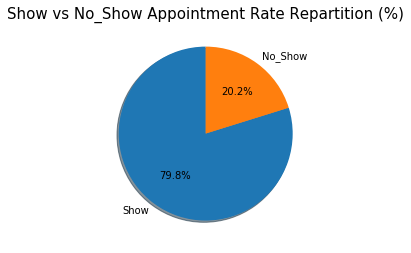

In [1622]:
# 2 new variable embedding the value of the Attend & Proportion Columns
labels = df_Attend_final['Attend']
sizes = df_Attend_final['Proportion']

# Plot Creation
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Show vs No_Show Appointment Rate Repartition (%)", fontsize = 15);
plt.show()


The majority of patients (79.8%) were present for their appointments. 

20.2% of the patients did not come, in the further exploration we will try to find correlations using the other variables to explain this absence.

### 2. Are SMS appointment reminders effective ?

As reminder SMS_received = 0 mean that the SMS has not been received

In [1623]:
df_sms1 = df.groupby('SMS_received')['No_Show'].value_counts()
df_sms1

SMS_received  No_Show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_Show, dtype: int64

In [1624]:
SMS = {'SMS_Received':['Yes', 'No'],
        'Show':[25698,62509 ],
        'No_Show':[9784, 12535],
       }
df_SMS = pd.DataFrame(SMS)
df_SMS

,SMS_Received,Show,No_Show
0,Yes,25698,9784
1,No,62509,12535


In [1625]:
# total SMS Received
sms_received_total = df_SMS.iloc[0,1] + df_SMS.iloc[0,2]
# total SMS No Received
sms_no_received_total = df_SMS.iloc[1,1] + df_SMS.iloc[1,2]

df_SMS['Total'] = [sms_received_total,sms_no_received_total]
df_SMS

,SMS_Received,Show,No_Show,Total
0,Yes,25698,9784,35482
1,No,62509,12535,75044


First observation:

The protocol of appointment reminder by sms isn't globally used by all doctors. 75k people did not receive it against only 35k having received it during the timeframe of the dataset.

To get a clearer idea of the effectiveness of this protocol. I'll try to plot the proportion of it

In [1626]:
# Show & no show for Sms received
Show_y = df_SMS.iloc[0,1]
noShow_y = df_SMS.iloc[0,2]

# Show & no show for Sms not received
Show_n = df_SMS.iloc[1,1]
noShow_n = df_SMS.iloc[1,2]

# Proportion of show & no show who received the SMS
prop_y_show = (Show_y/(sms_received_total))*100
prop_y_noshow = (noShow_y/(sms_received_total))*100

# Proportion of show & no show who not received the SMS
prop_n_show = (Show_n/(sms_no_received_total))*100
prop_n_noshow = (noShow_n/(sms_no_received_total))*100

df_SMS['Proportion_Show'] = [prop_y_show,prop_n_show]
df_SMS['Proportion_no_Show'] = [prop_y_noshow,prop_n_noshow]
df_SMS

,SMS_Received,Show,No_Show,Total,Proportion_Show,Proportion_no_Show
0,Yes,25698,9784,35482,72.425455,27.574545
1,No,62509,12535,75044,83.296466,16.703534


In [1627]:
# 2 new datframe based on df_SMS
df_sms_received_prop = pd.DataFrame(df_SMS)
df_sms_received_nbr = pd.DataFrame(df_SMS)

In [1628]:
#cleaning for getting sharper plot
df_sms_received_prop.drop(['Show','No_Show','Total'], axis=1, inplace=True)
df_sms_received_nbr.drop(['Proportion_Show','Proportion_no_Show','Total'], axis=1, inplace=True)

In [1629]:
df_sms_received_prop

,SMS_Received,Proportion_Show,Proportion_no_Show
0,Yes,72.425455,27.574545
1,No,83.296466,16.703534


In [1630]:
df_sms_received_nbr

,SMS_Received,Show,No_Show
0,Yes,25698,9784
1,No,62509,12535


Text(0, 0.5, 'number of appointment')

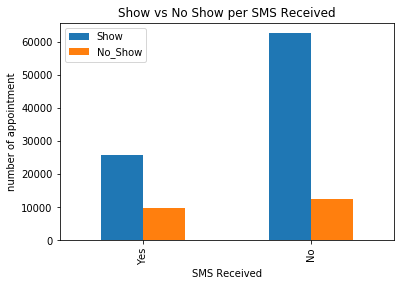

In [1631]:
df_sms_received_nbr.plot(kind='bar', title='Show vs No Show per SMS Received',x='SMS_Received')
plt.xlabel('SMS Received')
plt.ylabel('number of appointment')


Text(0, 0.5, 'proportion of appointment')

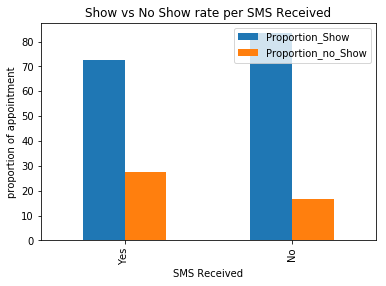

In [1632]:
df_sms_received_prop.plot(kind='bar', title='Show vs No Show rate per SMS Received',x='SMS_Received')
plt.xlabel('SMS Received')
plt.ylabel('proportion of appointment')

On the proportional plot, it can be observed that the results obtained when the sms was received do not make it possible to recognize the effectiveness of this protocol.
In fact, only 72% of the people who received this reminder showed up for the appointment, compared to 83% when the SMS was not received, wich means that there are more people not showing up after receiving the SMS.


### 3. Which neighborhoods have the more no shows?

In [1633]:
df['Neighborhood'].nunique()

81

81 neighbourhoods are represented with some having much more appointments than others. The idea here is to see which neighborhood in proportion to their appointments records the most no-shows.

In [1634]:
df_nghds_show = df.query('No_Show == 0')
df_nghds_noshow = df.query('No_Show == 1')

df_nghds_noshow


,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Proper_Day,Schedule_Dates,Schedule_Time,Appointment_Dates,diff_days
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,2016-04-27,15:05:12,2016-04-29,2 days
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,2016-04-27,15:39:58,2016-04-29,2 days
11,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,2016-04-26,08:44:12,2016-04-29,3 days
17,14794966191172,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,2016-04-28,09:28:57,2016-04-29,1 days
20,622257462899397,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,2016-04-27,07:51:14,2016-04-29,2 days
21,12154843752835,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,1,Wednesday,2016-04-27,10:50:45,2016-04-29,2 days
22,863229818887631,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,1,Monday,2016-04-25,13:29:16,2016-04-29,4 days
31,311284853849,5628907,M,2016-04-27 12:07:14,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,1,Wednesday,2016-04-27,12:07:14,2016-04-29,2 days
44,274164858852,5635414,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,Thursday,2016-04-28,13:27:27,2016-04-29,1 days
48,8545415176986,5618643,F,2016-04-26 07:19:49,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,1,Tuesday,2016-04-26,07:19:49,2016-04-29,3 days


In [1635]:
#cleaning for getting sharper plot
df_nghds_show.drop(['Patient_ID','Appointment_ID','Gender','Schedule_Day','Appointment_Day','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','Proper_Day','Schedule_Dates','Schedule_Time','Appointment_Dates','diff_days'], axis=1, inplace=True)
df_nghds_noshow.drop(['Patient_ID','Appointment_ID','Gender','Schedule_Day','Appointment_Day','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','Proper_Day','Schedule_Dates','Schedule_Time','Appointment_Dates','diff_days'], axis=1, inplace=True)

/Users/mathieurella/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1636]:
# renaming columns
df_nghds_show.columns = (['Neighborhood','Show'])
df_nghds_noshow.columns = (['Neighborhood','No_Show'])

# Retrieve number of Show and no show per Neighborhood
df_nghds_show = df_nghds_show['Neighborhood'].value_counts()
df_nghds_noshow = df_nghds_noshow['Neighborhood'].value_counts()

In [1637]:
df_nghds_show = pd.DataFrame(df_nghds_show)
df_nghds_noshow = pd.DataFrame(df_nghds_noshow)

In [1638]:
# renaming columns
df_nghds_show.columns = (['Show'])
df_nghds_noshow.columns = (['No_Show'])

In [1639]:
frames = [df_nghds_noshow,df_nghds_show]
df_Neighborhood = pd.concat(frames, axis=1, join='inner')

In [1640]:
sortnoshow = df_Neighborhood.sort_values(by ='No_Show', ascending=False).head(10)
sortshow = df_Neighborhood.sort_values(by ='Show', ascending=False).head(10)

In [1641]:
print('Does the 2 dataframe are the same ?', sortshow.equals(sortnoshow))

Does the 2 dataframe are the same ? False


After sorting the show and no show dataframe it appears that the're not the same, which means that there are some neighborhoods with a higher rate of no show/shows than others.
let's check this out

In [1642]:
df_Neighborhood['total'] = df_Neighborhood.apply(lambda row: row.No_Show + row.Show, axis=1)
df_Neighborhood['prop_nghds_noshow'] = df_Neighborhood.apply(lambda row: (row.No_Show / row.total)*100, axis=1)
df_Neighborhood['prop_nghds_show'] = df_Neighborhood.apply(lambda row: (row.Show / row.total)*100 , axis=1)

In [1643]:
df_Neighborhood.sort_values(by ='prop_nghds_noshow', ascending=False ).head(15)

,No_Show,Show,total,prop_nghds_noshow,prop_nghds_show
SANTOS DUMONT,369,907,1276,28.918495,71.081505
SANTA CECÍLIA,123,325,448,27.455357,72.544643
SANTA CLARA,134,372,506,26.482213,73.517787
ITARARÉ,923,2591,3514,26.266363,73.733637
JESUS DE NAZARETH,696,2157,2853,24.395373,75.604627
HORTO,42,133,175,24.000000,76.000000
ILHA DO PRÍNCIPE,532,1734,2266,23.477493,76.522507
CARATOÍRA,591,1974,2565,23.040936,76.959064
ANDORINHAS,521,1741,2262,23.032714,76.967286
PRAIA DO SUÁ,294,994,1288,22.826087,77.173913


In [1644]:
prop_nghds = pd.DataFrame(df_Neighborhood)

In [1645]:
prop_nghds.head()

,No_Show,Show,total,prop_nghds_noshow,prop_nghds_show
JARDIM CAMBURI,1465,6252,7717,18.984061,81.015939
MARIA ORTIZ,1219,4586,5805,20.999139,79.000861
ITARARÉ,923,2591,3514,26.266363,73.733637
RESISTÊNCIA,906,3525,4431,20.446852,79.553148
CENTRO,703,2631,3334,21.085783,78.914217


In [1646]:
prop_nghds.drop(['No_Show','Show','total'], axis=1, inplace=True)

In [1647]:
prop_nghds.head()

,prop_nghds_noshow,prop_nghds_show
JARDIM CAMBURI,18.984061,81.015939
MARIA ORTIZ,20.999139,79.000861
ITARARÉ,26.266363,73.733637
RESISTÊNCIA,20.446852,79.553148
CENTRO,21.085783,78.914217


In [1648]:
prop_nghds['prop_nghds_noshow'].mean()

19.797035228783407

In [1649]:
prop_nghds = prop_nghds.query('prop_nghds_noshow > 19.79')

In [1650]:
prop_nghds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, MARIA ORTIZ to ILHA DO FRADE
Data columns (total 2 columns):
prop_nghds_noshow    38 non-null float64
prop_nghds_show      38 non-null float64
dtypes: float64(2)
memory usage: 912.0+ bytes


There are 38 neighbourhoods out of 81 that have an above-average no-show rate. For the sake of clarity we will only represent the top 10.

In [1651]:
prop_nghds = prop_nghds.sort_values(by ='prop_nghds_noshow', ascending=False ).head(10)

In [1652]:
prop_nghds.index.name = 'Neighborhood'
prop_nghds['Neighborhood'] = prop_nghds.index

In [1653]:
prop_nghds

,prop_nghds_noshow,prop_nghds_show,Neighborhood
Neighborhood,,,
SANTOS DUMONT,28.918495,71.081505,SANTOS DUMONT
SANTA CECÍLIA,27.455357,72.544643,SANTA CECÍLIA
SANTA CLARA,26.482213,73.517787,SANTA CLARA
ITARARÉ,26.266363,73.733637,ITARARÉ
JESUS DE NAZARETH,24.395373,75.604627,JESUS DE NAZARETH
HORTO,24.000000,76.000000,HORTO
ILHA DO PRÍNCIPE,23.477493,76.522507,ILHA DO PRÍNCIPE
CARATOÍRA,23.040936,76.959064,CARATOÍRA
ANDORINHAS,23.032714,76.967286,ANDORINHAS


Text(0, 0.5, 'Presence (%)')

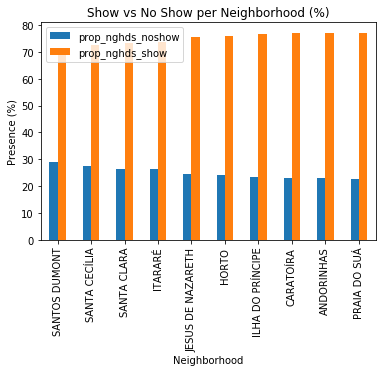

In [1654]:
prop_nghds.plot(kind='bar', title='Show vs No Show per Neighborhood (%)',x='Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Presence (%)')

Santos Dumont is the neighborhood with the highest rate of absenteeism for appointments with 28% of no show.

### 4. Do No Show depends of days of the week ?

In [1655]:
df.groupby('Proper_Day')['No_Show'].value_counts()

Proper_Day  No_Show
Friday      0          15028
            1           3887
Monday      0          18523
            1           4561
Saturday    0             23
            1              1
Thursday    0          14373
            1           3700
Tuesday     0          20877
            1           5291
Wednesday   0          19383
            1           4879
Name: No_Show, dtype: int64

In [1656]:
data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        'Show':[18523, 20877, 19383, 14373, 15028, 23],
        'No_Show':[4561, 5291, 4879, 3700,3887,1],
       }
df_final_12 = pd.DataFrame(data)
df_final_12

,Day,Show,No_Show
0,Monday,18523,4561
1,Tuesday,20877,5291
2,Wednesday,19383,4879
3,Thursday,14373,3700
4,Friday,15028,3887
5,Saturday,23,1


In [1657]:
# total per day
total_Monday = df_final_12.iloc[0,1] + df_final_12.iloc[0,2]
total_Tuesday = df_final_12.iloc[1,1] + df_final_12.iloc[1,2]
total_Wednesday = df_final_12.iloc[2,1] + df_final_12.iloc[2,2]
total_Thursday = df_final_12.iloc[3,1] + df_final_12.iloc[3,2]
total_Friday = df_final_12.iloc[4,1] + df_final_12.iloc[4,2]
total_Saturday = df_final_12.iloc[5,1] + df_final_12.iloc[5,2]

# Show per day
Show_Monday = df_final_12.iloc[0,1]
Show_Tuesday = df_final_12.iloc[1,1]
Show_Wednesday = df_final_12.iloc[2,1]
Show_Thursday = df_final_12.iloc[3,1]
Show_Friday = df_final_12.iloc[4,1]
Show_Saturday = df_final_12.iloc[5,1]

# No_Show per day
No_Show_Monday = df_final_12.iloc[0,2]
No_Show_Tuesday = df_final_12.iloc[1,2]
No_Show_Wednesday = df_final_12.iloc[2,2]
No_Show_Thursday = df_final_12.iloc[3,2]
No_Show_Friday = df_final_12.iloc[4,2]
No_Show_Saturday = df_final_12.iloc[5,2]

In [1658]:
# Proportion of Show per day
Prop_S_Monday = (Show_Monday/(total_Monday))*100
Prop_S_Tuesday = (Show_Tuesday/(total_Tuesday))*100
Prop_S_Wednesday = (Show_Wednesday/(total_Wednesday))*100
Prop_S_Thursday = (Show_Thursday/(total_Thursday))*100
Prop_S_Friday = (Show_Friday/(total_Friday))*100
Prop_S_Saturday = (Show_Saturday/(total_Saturday))*100

# Proportion of No_Show per day
Prop_NS_Monday = (No_Show_Monday/(total_Monday))*100
Prop_NS_Tuesday = (No_Show_Tuesday/(total_Tuesday))*100
Prop_NS_Wednesday = (No_Show_Wednesday/(total_Wednesday))*100
Prop_NS_Thursday = (No_Show_Thursday/(total_Thursday))*100
Prop_NS_Friday = (No_Show_Friday/(total_Friday))*100
Prop_NS_Saturday = (No_Show_Saturday/(total_Saturday))*100

In [1659]:
data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        'Show':[18523, 20877, 19383, 14373, 15028, 23],
        'No_Show':[4561, 5291, 4879, 3700,3887,1],
        'Total/day':[total_Monday, total_Tuesday, total_Wednesday, total_Thursday,total_Friday,total_Saturday],
        'Prop_Show':[Prop_S_Monday, Prop_S_Tuesday, Prop_S_Wednesday, Prop_S_Thursday, Prop_S_Friday, Prop_S_Saturday],
        'Prop_No_Show':[Prop_NS_Monday, Prop_NS_Tuesday, Prop_NS_Wednesday, Prop_NS_Thursday, Prop_NS_Friday, Prop_NS_Saturday],
       }
df_prop_12 = pd.DataFrame(data)
df_prop_12

,Day,Show,No_Show,Total/day,Prop_Show,Prop_No_Show
0,Monday,18523,4561,23084,80.241726,19.758274
1,Tuesday,20877,5291,26168,79.780648,20.219352
2,Wednesday,19383,4879,24262,79.890364,20.109636
3,Thursday,14373,3700,18073,79.527472,20.472528
4,Friday,15028,3887,18915,79.450172,20.549828
5,Saturday,23,1,24,95.833333,4.166667


In [1660]:
# 2 new datframe based on df_prop_12
df_proportion_12 = pd.DataFrame(df_prop_12)
df_Total_12 = pd.DataFrame(df_prop_12)

In [1661]:
#cleaning for getting sharper plot
df_proportion_12.drop(['Show','No_Show','Total/day'], axis=1, inplace=True)
df_Total_12.drop(['Prop_Show','Prop_No_Show','Total/day'], axis=1, inplace=True)


In [1662]:
df_proportion_12

,Day,Prop_Show,Prop_No_Show
0,Monday,80.241726,19.758274
1,Tuesday,79.780648,20.219352
2,Wednesday,79.890364,20.109636
3,Thursday,79.527472,20.472528
4,Friday,79.450172,20.549828
5,Saturday,95.833333,4.166667


In [1663]:
df_Total_12

,Day,Show,No_Show
0,Monday,18523,4561
1,Tuesday,20877,5291
2,Wednesday,19383,4879
3,Thursday,14373,3700
4,Friday,15028,3887
5,Saturday,23,1


Text(0, 0.5, 'Nbr of people')

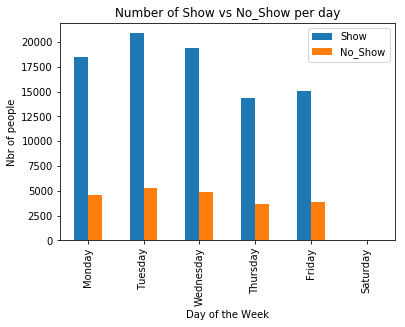

In [1664]:
df_Total_12.plot(kind='bar', title='Number of Show vs No_Show per day',x='Day')
plt.xlabel('Day of the Week')
plt.ylabel('Nbr of people')

The number of appointment seems slightly different that's why we're going to plot the proportion of show vs no show per day 

Text(0, 0.5, 'Proportion of people')

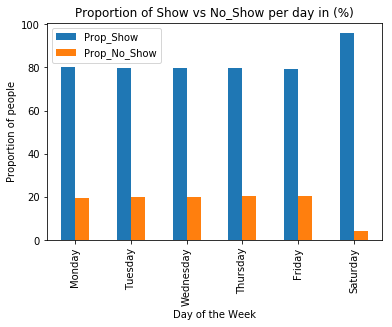

In [1665]:
df_proportion_12.plot(kind='bar', title='Proportion of Show vs No_Show per day in (%)',x='Day')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of people')


the repartition of show vs no show seems similar wheter the day of the week, except in saturday where there is a greater show distribution but the sample being less populated (24 appointments) no correlation is graphically visible between show vs no show compared to the day of the week.

### 5. Age distribution of no-shows versus shows?

In [1666]:
# no show median Age
no_show_age_median = df.query('No_Show == 1')
no_show_age_median = no_show_age_median['Age'].mean()

# Show median Age
show_age_median = df.query('No_Show == 0')
show_age_median = show_age_median['Age'].mean()

In [1667]:
print('The average Age of people not Showing up to appointment is',no_show_age_median,'years old')
print('The average Age of people Showing up to appointment is',show_age_median,'years old')

The average Age of people not Showing up to appointment is 34.31766656212196 years old
The average Age of people Showing up to appointment is 37.790504154999034 years old


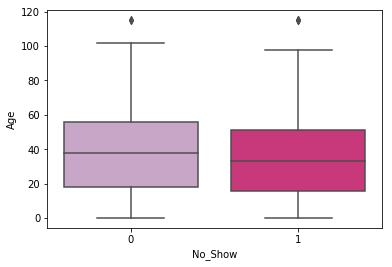

In [1668]:
sns.boxplot(x=df.No_Show, y=df.Age, palette="PuRd" )
plt.show()

Through this boxplot, we notice that older people are more inclined to be present at their appointments.

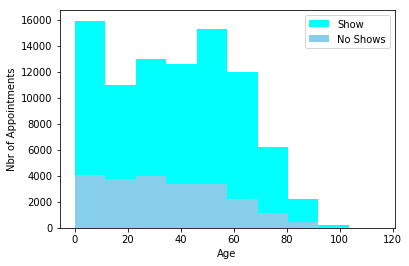

In [1669]:
Show = (df.No_Show == 0)
df[Show].Age.plot.hist(color = "aqua")
No_Show = (df.No_Show == 1)
df[No_Show].Age.plot.hist(color = "skyblue")
plt.legend(['Show', 'No Shows'])
plt.xlabel('Age')
plt.ylabel('Nbr of Appointments')
plt.show()

This histogram visually validates the fact that older people are less absent for their appointments however contrary to the average calculated rather this trend is visually significant around 50-60 years old and therefore not as acurate

<a id='conclusions'></a>
## Conclusions

If at first sight the original dataset seemed relatively clean a lot of confusing information appeared during the exploration of the data such as the column handicap or age that I decided not to modify too much either because it was not going to be exploited or because it was information that seemed correct on the form like the 2 patients aged 115 years old even if on the substance these are extremely rare cases where doubt is allowed.

##### Limitation

Based on the description of the dataset here, after I started cleaning and analyzing it, it turned out that some of the variables did not match the description:

- between different variable names (DataMarcacaoConsulta = Schedule_Day ,DataAgendamento = Appointment_Day)

- some variable presented as boolean but which records more than 2 values (handicap)

- the variable no-show was by its confusing nomenclature because I associated the 1/true to a show when it was the opposite

- The variables presented do not explain the cause of the show/no-show of the appointment. We can expect that a sick person is more punctual at the appointments than the others. On the other hand if these variables return 0 it does not explain at all his absence at the appointments (maybe he had to work, or that there were traffic jams ...) so many reasons which do not allow us in my opinion to create more consolidated correlations.

Finally concerning the dataset some aberrant data was present like the negative age, or very high (115 years) all these small limitation and the few surprising observations which could be made (sms reminder in particular) led me to doubt the integrity of the data of all the dataset.
In this supposed context, the analysis which is made can only be truncated.




##### Observations

######  1 . Appointment show-up vs. no show-up rate

The majority of patients (79.8%) were present for their appointments.
20.2% of the patients did not come

###### 2. Are SMS appointment reminders effective ?

It's certainly the most surprising variable that have been analyzed, at first glance (without analysis) I would have thought that the SMS reminder would have increased the number of shows on the date.
This protocol had the opposite effect, only 72% of the people who received this reminder showed up for the appointment, compared to 83% when the SMS was not received,
After analysis it turned out that this protocol of sending sms is not effective.


###### 3. Which neighborhoods have the more no shows?

After sorting the show and no show dataframe through the prism of neighborhoods, it appears that they're not the same, which means that there are some neighborhoods with a higher rate of no show/shows than others.
At this point the neighborhoods of jardim camburi and maria ortiz count the most shows and no shows, I decided to check wich neighborhoods appears to have the highest no-show rate
Santos Dumont was the neighborhood with the highest rate of absenteeism for appointments with 28% of no show.


###### 4. Do No Show depends of days of the week ?

The repartition of show vs no show seems similar whether the day of the week, except in saturday where there is a greater show distribution but the sample being less populated (24 appointments) no correlation is graphically visible between show vs no show compared to the day of the week.

###### 5. Age distribution of no-shows versus shows?

After calculating the average age of those who went to the appointment and those who did not go to, it turned out that the average age of those who show up to the appointment was slightly older (37 years old vs 34 years old).
Through a histogram this trend was clearly visible around the age of 60.

##### Lastly

The investigation of this dataset allowed us to make some observations about different variables, it could be interesting for the future to make a more advanced statistical analysis to prove the correlation of these independent variables with the no show rate.


In [ ]:
# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I investigate the Medical Appointment no show dataset.
This dataset has collected information from 110 527 medical appointments in Brazil for roughly 7 month.

This dataset mainly focused on whether or not patients show up to their appointment. it appears to have extensive socio-demographic & health information at our disposal to potentially know the causes of their absences.

##### By order here are the several variables :

`01 - PatientId            = Identification of a patient`

`02 - AppointmentID        = Identification of each appointment`

`03 - Gender               = Male or Female`

`04 - Schedule_Day         = The day of the actuall appointment, when they have to visit the doctor.`

`05 - Appointment_Day      = The day someone called or registered the appointment.`

`06 - Age                  = How old is the patient.`

`07 - Neighbourhood        = Where the appointment takes place.`

`08 - Scholarship          = indicates whether or not the patient is enrolled in Brasilian welfare program.`

`09 - Hipertension         = True or False`

`10 - Diabetes             = True or False`

`11 - Alcoholism           = True or False`

`12 - Handcap              = True or False`

`13 - SMS_received         = 1 or more messages sent to the patient.`

`14 - No-show              = ‘No’ if the patient showed up, ‘Yes’ if they did not show up.`


#### Questions to be investigated:

######  1 . Appointment show-up vs. no show-up rate ?

###### 2. Are SMS appointment reminders effective ?

###### 3. Which neighborhoods have the more no shows?

###### 4. Do No Show depends of days of the week ?

###### 5. Age distribution of no-shows versus shows?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

Over 110 527 row are available to be process on 14 columns. 

#### Data Wrangling

Looking for data aberations (Null, duplicates, non sens) 

# checking for null values
null = pd.isna(df).sum()
print(null)

# checking for duplicate values
duplicates = df.duplicated().sum()
print(duplicates)

> Null & Duplicates Value are inexistant in this dataset

> Now let's look at the data set more specifically:

df.head()

df.info()

df.describe()

> For a better understanding i'll first :
    - Rename some columns 
    - Change the types of some variable
    - address some inconsistency : 
    
                                - min age = -1
                                - Max age = 115 

### Data Cleaning

#### 1. Changing column names

df.rename(columns = {'PatientId':'Patient_ID',
                     'AppointmentID':'Appointment_ID',
                     'ScheduledDay':'Schedule_Day', 
                     'AppointmentDay':'Appointment_Day', 
                     'Neighbourhood': 'Neighborhood', 
                     'Hipertension': 'Hypertension',
                     'Handcap':'Handicap',
                     'No-show':'No_Show'}, inplace = True)
df.head()

#### 2. Changing Datatypes

df.info()

##### Change to make

Patient_ID       :  Float → Int ✓

Appointment_Day  :  Float → Int ✓

Schedule_Day     :  Float → Int ✓

No_Show          :  Str → Int  ✓



####                    A]  Patient Id  ✓

# Patient Id from float to int, for no longer dealing with + decimal format
df['Patient_ID'] = df['Patient_ID'].astype(int)
df.info()

####                    B]  Appointment Day   ✓
Reminder : The day someone called or registered the appointment, this is before appointment of course.
We'll clean the columns by deleting the hours format and only let appears the date

# Appointment_Day from String to Datetime
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df.info()

df

####                    C]  Schedule Day

Reminder : The day of the actuall appointment, when they have to visit the doctor.
First we'll change the types, clean the schedule_day columns to only make appear the date, then create 2 new columns with the hours of the appointment and the specific day of the appointment

# Schedule_Day from String to Datetime
df['Schedule_Day'] = pd.to_datetime(df['Schedule_Day'])
df

# Create a new column to know the day of the date
df['Proper_Day'] = df['Schedule_Day'].dt.day_name()
df

# Split the Date and time from Schedule_Day

df['Schedule_Dates'] = df['Schedule_Day'].dt.date
df['Schedule_Time'] = df['Schedule_Day'].dt.time
df['Appointment_Dates'] = df['Appointment_Day'].dt.date

df.info()

df['diff_days'] = df['Appointment_Dates'] - df['Schedule_Dates']

df

We made several change to df :

- First whe change the types of `Schedule_Day`

- Then we create Proper_Day column to associate the schedule date with a specific day

- The 2 other columns are here to see if any periodic factor could explain a No Show, I still don't know how to exploit it since i'm not able to change their types to datetime especially for the Scheduled_Time column.

####                    D]  No Show

print(df['No_Show'].value_counts())


print(type(df['No_Show'][0]))

Only 2 variable in the ’No_Show’ column, yes & no as string let's transform it in integer.

As reminder :

              - ‘No’ if the patient showed up, 
              - ‘Yes’ if they did not show up.
              
I'll transform ’No_Show’ to look like this: 

                                       - ‘No’ = False = 0
                                       - ‘Yes’ = True = 1

#First, I replace the string per numeric as shown above ↑
df['No_Show'] = df['No_Show'].replace(['No'], '0')
df['No_Show'] = df['No_Show'].replace(['Yes'], '1')

print(df['No_Show'].value_counts())

# No_Show from str to int, for being able to make some visualisation possible
df['No_Show'] = df['No_Show'].astype(int)

df['No_Show'].dtypes

The dataset seems pretty clean so far, in terms of renaming, changing types,adding new variables.
I still have to deals with min age of -1

####                    E]  Fixing Min age

For reminder :

df['Age'].describe().loc[['min']]

df['Age'].value_counts().sort_index()

Since there is only 1 patient whose age is -1 year, I assume this is a typing error and could not affect the outcome of future research. That's why, I will delete this row

df = df.query("Age != -1")
df['Age'].describe().loc[['min']]

####                    F]  Coverage in months of the dataset

sort_schedule = df.sort_values(by="Schedule_Day")

firstday = sort_schedule['Schedule_Day'].iat[0]
lastday = sort_schedule['Schedule_Day'].iat[-1]

diff = lastday.to_period('m') - firstday.to_period('m')
print(diff ,'months elapsed between the first and last appointment taken' )

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  1 . Appointment show-up vs. no show-up rate

 For the sake of clarity, to establish the rate of show vs no show I will create a new dataframe.   


print(df['No_Show'].value_counts())

df_Attend =  df.query('No_Show == 0')
print(df_Attend['No_Show'].value_counts())
df_Attend1 =  df.query('No_Show == 1')
print(df_Attend1['No_Show'].value_counts())

df_Attend = df_Attend.No_Show.count()
df_Attend1 = df_Attend1.No_Show.count()

df_Attend_final = pd.DataFrame({'Attend':['Show','No_Show'], 'Total':[df_Attend,df_Attend1]})
df_Attend_final

Show = (df_Attend/(df_Attend + df_Attend1))*100
No_Show = (df_Attend1/(df_Attend + df_Attend1))*100
df_Attend_final['Proportion'] = [Show,No_Show]
print(df_Attend_final)

# 2 new variable embedding the value of the Attend & Proportion Columns
labels = df_Attend_final['Attend']
sizes = df_Attend_final['Proportion']

# Plot Creation
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Show vs No_Show Appointment Rate Repartition (%)", fontsize = 15);
plt.show()


The majority of patients (79.8%) were present for their appointments. 

20.2% of the patients did not come, in the further exploration we will try to find correlations using the other variables to explain this absence.

### 2. Are SMS appointment reminders effective ?

As reminder SMS_received = 0 mean that the SMS has not been received

df_sms1 = df.groupby('SMS_received')['No_Show'].value_counts()
df_sms1

SMS = {'SMS_Received':['Yes', 'No'],
        'Show':[25698,62509 ],
        'No_Show':[9784, 12535],
       }
df_SMS = pd.DataFrame(SMS)
df_SMS

# total SMS Received
sms_received_total = df_SMS.iloc[0,1] + df_SMS.iloc[0,2]
# total SMS No Received
sms_no_received_total = df_SMS.iloc[1,1] + df_SMS.iloc[1,2]

df_SMS['Total'] = [sms_received_total,sms_no_received_total]
df_SMS

First observation:

The protocol of appointment reminder by sms isn't globally used by all doctors. 75k people did not receive it against only 35k having received it during the timeframe of the dataset.

To get a clearer idea of the effectiveness of this protocol. I'll try to plot the proportion of it

# Show & no show for Sms received
Show_y = df_SMS.iloc[0,1]
noShow_y = df_SMS.iloc[0,2]

# Show & no show for Sms not received
Show_n = df_SMS.iloc[1,1]
noShow_n = df_SMS.iloc[1,2]

# Proportion of show & no show who received the SMS
prop_y_show = (Show_y/(sms_received_total))*100
prop_y_noshow = (noShow_y/(sms_received_total))*100

# Proportion of show & no show who not received the SMS
prop_n_show = (Show_n/(sms_no_received_total))*100
prop_n_noshow = (noShow_n/(sms_no_received_total))*100

df_SMS['Proportion_Show'] = [prop_y_show,prop_n_show]
df_SMS['Proportion_no_Show'] = [prop_y_noshow,prop_n_noshow]
df_SMS

# 2 new datframe based on df_SMS
df_sms_received_prop = pd.DataFrame(df_SMS)
df_sms_received_nbr = pd.DataFrame(df_SMS)

#cleaning for getting sharper plot
df_sms_received_prop.drop(['Show','No_Show','Total'], axis=1, inplace=True)
df_sms_received_nbr.drop(['Proportion_Show','Proportion_no_Show','Total'], axis=1, inplace=True)

df_sms_received_prop

df_sms_received_nbr

df_sms_received_nbr.plot(kind='bar', title='Show vs No Show per SMS Received',x='SMS_Received')
plt.xlabel('SMS Received')
plt.ylabel('number of appointment')


df_sms_received_prop.plot(kind='bar', title='Show vs No Show rate per SMS Received',x='SMS_Received')
plt.xlabel('SMS Received')
plt.ylabel('proportion of appointment')

On the proportional plot, it can be observed that the results obtained when the sms was received do not make it possible to recognize the effectiveness of this protocol.
In fact, only 72% of the people who received this reminder showed up for the appointment, compared to 83% when the SMS was not received, wich means that there are more people not showing up after receiving the SMS.


### 3. Which neighborhoods have the more no shows?

df['Neighborhood'].nunique()

81 neighbourhoods are represented with some having much more appointments than others. The idea here is to see which neighborhood in proportion to their appointments records the most no-shows.

df_nghds_show = df.query('No_Show == 0')
df_nghds_noshow = df.query('No_Show == 1')

df_nghds_noshow


#cleaning for getting sharper plot
df_nghds_show.drop(['Patient_ID','Appointment_ID','Gender','Schedule_Day','Appointment_Day','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','Proper_Day','Schedule_Dates','Schedule_Time','Appointment_Dates','diff_days'], axis=1, inplace=True)
df_nghds_noshow.drop(['Patient_ID','Appointment_ID','Gender','Schedule_Day','Appointment_Day','Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','Proper_Day','Schedule_Dates','Schedule_Time','Appointment_Dates','diff_days'], axis=1, inplace=True)

# renaming columns
df_nghds_show.columns = (['Neighborhood','Show'])
df_nghds_noshow.columns = (['Neighborhood','No_Show'])

# Retrieve number of Show and no show per Neighborhood
df_nghds_show = df_nghds_show['Neighborhood'].value_counts()
df_nghds_noshow = df_nghds_noshow['Neighborhood'].value_counts()

df_nghds_show = pd.DataFrame(df_nghds_show)
df_nghds_noshow = pd.DataFrame(df_nghds_noshow)

# renaming columns
df_nghds_show.columns = (['Show'])
df_nghds_noshow.columns = (['No_Show'])

frames = [df_nghds_noshow,df_nghds_show]
df_Neighborhood = pd.concat(frames, axis=1, join='inner')

sortnoshow = df_Neighborhood.sort_values(by ='No_Show', ascending=False).head(10)
sortshow = df_Neighborhood.sort_values(by ='Show', ascending=False).head(10)

print('Does the 2 dataframe are the same ?', sortshow.equals(sortnoshow))

After sorting the show and no show dataframe it appears that the're not the same, which means that there are some neighborhoods with a higher rate of no show/shows than others.
let's check this out

df_Neighborhood['total'] = df_Neighborhood.apply(lambda row: row.No_Show + row.Show, axis=1)
df_Neighborhood['prop_nghds_noshow'] = df_Neighborhood.apply(lambda row: (row.No_Show / row.total)*100, axis=1)
df_Neighborhood['prop_nghds_show'] = df_Neighborhood.apply(lambda row: (row.Show / row.total)*100 , axis=1)

df_Neighborhood.sort_values(by ='prop_nghds_noshow', ascending=False ).head(15)

prop_nghds = pd.DataFrame(df_Neighborhood)

prop_nghds.head()

prop_nghds.drop(['No_Show','Show','total'], axis=1, inplace=True)

prop_nghds.head()

prop_nghds['prop_nghds_noshow'].mean()

prop_nghds = prop_nghds.query('prop_nghds_noshow > 19.79')

prop_nghds.info()

There are 38 neighbourhoods out of 81 that have an above-average no-show rate. For the sake of clarity we will only represent the top 10.

prop_nghds = prop_nghds.sort_values(by ='prop_nghds_noshow', ascending=False ).head(10)

prop_nghds.index.name = 'Neighborhood'
prop_nghds['Neighborhood'] = prop_nghds.index

prop_nghds

prop_nghds.plot(kind='bar', title='Show vs No Show per Neighborhood (%)',x='Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Presence (%)')

Santos Dumont is the neighborhood with the highest rate of absenteeism for appointments with 28% of no show.

### 4. Do No Show depends of days of the week ?

df.groupby('Proper_Day')['No_Show'].value_counts()

data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        'Show':[18523, 20877, 19383, 14373, 15028, 23],
        'No_Show':[4561, 5291, 4879, 3700,3887,1],
       }
df_final_12 = pd.DataFrame(data)
df_final_12

# total per day
total_Monday = df_final_12.iloc[0,1] + df_final_12.iloc[0,2]
total_Tuesday = df_final_12.iloc[1,1] + df_final_12.iloc[1,2]
total_Wednesday = df_final_12.iloc[2,1] + df_final_12.iloc[2,2]
total_Thursday = df_final_12.iloc[3,1] + df_final_12.iloc[3,2]
total_Friday = df_final_12.iloc[4,1] + df_final_12.iloc[4,2]
total_Saturday = df_final_12.iloc[5,1] + df_final_12.iloc[5,2]

# Show per day
Show_Monday = df_final_12.iloc[0,1]
Show_Tuesday = df_final_12.iloc[1,1]
Show_Wednesday = df_final_12.iloc[2,1]
Show_Thursday = df_final_12.iloc[3,1]
Show_Friday = df_final_12.iloc[4,1]
Show_Saturday = df_final_12.iloc[5,1]

# No_Show per day
No_Show_Monday = df_final_12.iloc[0,2]
No_Show_Tuesday = df_final_12.iloc[1,2]
No_Show_Wednesday = df_final_12.iloc[2,2]
No_Show_Thursday = df_final_12.iloc[3,2]
No_Show_Friday = df_final_12.iloc[4,2]
No_Show_Saturday = df_final_12.iloc[5,2]

# Proportion of Show per day
Prop_S_Monday = (Show_Monday/(total_Monday))*100
Prop_S_Tuesday = (Show_Tuesday/(total_Tuesday))*100
Prop_S_Wednesday = (Show_Wednesday/(total_Wednesday))*100
Prop_S_Thursday = (Show_Thursday/(total_Thursday))*100
Prop_S_Friday = (Show_Friday/(total_Friday))*100
Prop_S_Saturday = (Show_Saturday/(total_Saturday))*100

# Proportion of No_Show per day
Prop_NS_Monday = (No_Show_Monday/(total_Monday))*100
Prop_NS_Tuesday = (No_Show_Tuesday/(total_Tuesday))*100
Prop_NS_Wednesday = (No_Show_Wednesday/(total_Wednesday))*100
Prop_NS_Thursday = (No_Show_Thursday/(total_Thursday))*100
Prop_NS_Friday = (No_Show_Friday/(total_Friday))*100
Prop_NS_Saturday = (No_Show_Saturday/(total_Saturday))*100

data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        'Show':[18523, 20877, 19383, 14373, 15028, 23],
        'No_Show':[4561, 5291, 4879, 3700,3887,1],
        'Total/day':[total_Monday, total_Tuesday, total_Wednesday, total_Thursday,total_Friday,total_Saturday],
        'Prop_Show':[Prop_S_Monday, Prop_S_Tuesday, Prop_S_Wednesday, Prop_S_Thursday, Prop_S_Friday, Prop_S_Saturday],
        'Prop_No_Show':[Prop_NS_Monday, Prop_NS_Tuesday, Prop_NS_Wednesday, Prop_NS_Thursday, Prop_NS_Friday, Prop_NS_Saturday],
       }
df_prop_12 = pd.DataFrame(data)
df_prop_12

# 2 new datframe based on df_prop_12
df_proportion_12 = pd.DataFrame(df_prop_12)
df_Total_12 = pd.DataFrame(df_prop_12)

#cleaning for getting sharper plot
df_proportion_12.drop(['Show','No_Show','Total/day'], axis=1, inplace=True)
df_Total_12.drop(['Prop_Show','Prop_No_Show','Total/day'], axis=1, inplace=True)


df_proportion_12

df_Total_12

df_Total_12.plot(kind='bar', title='Number of Show vs No_Show per day',x='Day')
plt.xlabel('Day of the Week')
plt.ylabel('Nbr of people')

The number of appointment seems slightly different that's why we're going to plot the proportion of show vs no show per day 

df_proportion_12.plot(kind='bar', title='Proportion of Show vs No_Show per day in (%)',x='Day')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of people')


the repartition of show vs no show seems similar wheter the day of the week, except in saturday where there is a greater show distribution but the sample being less populated (24 appointments) no correlation is graphically visible between show vs no show compared to the day of the week.

### 5. Age distribution of no-shows versus shows?

# no show median Age
no_show_age_median = df.query('No_Show == 1')
no_show_age_median = no_show_age_median['Age'].mean()

# Show median Age
show_age_median = df.query('No_Show == 0')
show_age_median = show_age_median['Age'].mean()

print('The average Age of people not Showing up to appointment is',no_show_age_median,'years old')
print('The average Age of people Showing up to appointment is',show_age_median,'years old')

sns.boxplot(x=df.No_Show, y=df.Age, palette="PuRd" )
plt.show()

Through this boxplot, we notice that older people are more inclined to be present at their appointments.

Show = (df.No_Show == 0)
df[Show].Age.plot.hist(color = "aqua")
No_Show = (df.No_Show == 1)
df[No_Show].Age.plot.hist(color = "skyblue")
plt.legend(['Show', 'No Shows'])
plt.xlabel('Age')
plt.ylabel('Nbr of Appointments')
plt.show()

This histogram visually validates the fact that older people are less absent for their appointments however contrary to the average calculated rather this trend is visually significant around 50-60 years old and therefore not as acurate

<a id='conclusions'></a>
## Conclusions

If at first sight the original dataset seemed relatively clean a lot of confusing information appeared during the exploration of the data such as the column handicap or age that I decided not to modify too much either because it was not going to be exploited or because it was information that seemed correct on the form like the 2 patients aged 115 years old even if on the substance these are extremely rare cases where doubt is allowed.

##### Limitation

Based on the description of the dataset here, after I started cleaning and analyzing it, it turned out that some of the variables did not match the description:

- between different variable names (DataMarcacaoConsulta = Schedule_Day ,DataAgendamento = Appointment_Day)

- some variable presented as boolean but which records more than 2 values (handicap)

- the variable no-show was by its confusing nomenclature because I associated the 1/true to a show when it was the opposite

- The variables presented do not explain the cause of the show/no-show of the appointment. We can expect that a sick person is more punctual at the appointments than the others. On the other hand if these variables return 0 it does not explain at all his absence at the appointments (maybe he had to work, or that there were traffic jams ...) so many reasons which do not allow us in my opinion to create more consolidated correlations.

Finally concerning the dataset some aberrant data was present like the negative age, or very high (115 years) all these small limitation and the few surprising observations which could be made (sms reminder in particular) led me to doubt the integrity of the data of all the dataset.
In this supposed context, the analysis which is made can only be truncated.




##### Observations

######  1 . Appointment show-up vs. no show-up rate

The majority of patients (79.8%) were present for their appointments.
20.2% of the patients did not come

###### 2. Are SMS appointment reminders effective ?

It's certainly the most surprising variable that have been analyzed, at first glance (without analysis) I would have thought that the SMS reminder would have increased the number of shows on the date.
This protocol had the opposite effect, only 72% of the people who received this reminder showed up for the appointment, compared to 83% when the SMS was not received,
After analysis it turned out that this protocol of sending sms is not effective.


###### 3. Which neighborhoods have the more no shows?

After sorting the show and no show dataframe through the prism of neighborhoods, it appears that they're not the same, which means that there are some neighborhoods with a higher rate of no show/shows than others.
At this point the neighborhoods of jardim camburi and maria ortiz count the most shows and no shows, I decided to check wich neighborhoods appears to have the highest no-show rate
Santos Dumont was the neighborhood with the highest rate of absenteeism for appointments with 28% of no show.


###### 4. Do No Show depends of days of the week ?

The repartition of show vs no show seems similar whether the day of the week, except in saturday where there is a greater show distribution but the sample being less populated (24 appointments) no correlation is graphically visible between show vs no show compared to the day of the week.

###### 5. Age distribution of no-shows versus shows?

After calculating the average age of those who went to the appointment and those who did not go to, it turned out that the average age of those who show up to the appointment was slightly older (37 years old vs 34 years old).
Through a histogram this trend was clearly visible around the age of 60.

##### Lastly

The investigation of this dataset allowed us to make some observations about different variables, it could be interesting for the future to make a more advanced statistical analysis to prove the correlation of these independent variables with the no show rate.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])